<a href="https://colab.research.google.com/github/Lcocks/DS050-DeepLearning/blob/main/1_LinRegressionScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== LINEAR REGRESSION FROM SCRATCH ===

1. Generating data...
True parameters: w=2.0, b=1.0

2. Analytical solution...
X shape: (50,) -> X_augmented shape: (50, 2)
Analytical solution: w=1.884, b=1.129
Optimal loss: 3.301

3. Gradient descent...
Epoch    0: Loss = 145.3703, w = 0.691, b = 0.105
Epoch  200: Loss = 3.3650, w = 1.959, b = 0.630
Epoch  400: Loss = 3.3241, w = 1.929, b = 0.828
Epoch  600: Loss = 3.3091, w = 1.911, b = 0.947
Epoch  800: Loss = 3.3037, w = 1.900, b = 1.019

Gradient descent result: w=1.894, b=1.062
Difference from analytical: Δw=0.009943, Δb=0.066462

4. Visualization...


/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-1-367158453.py:41: RuntimeWarning: overflow encountered in square
  mse = np.mean(errors**2)
/usr/local/lib/python3.11/dist-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


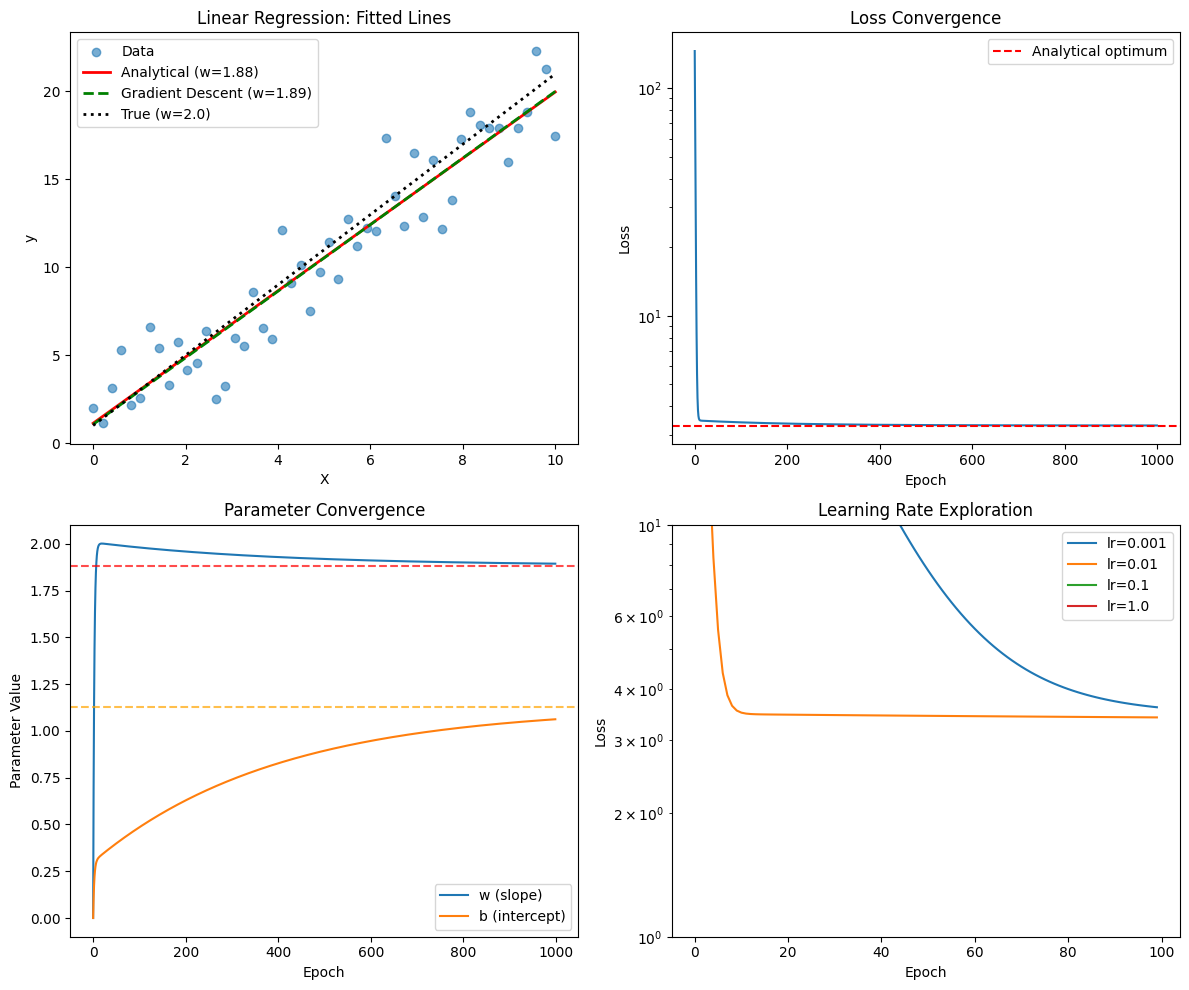


5. Debugging Exercise:
Try these experiments:
- What happens with lr=1.0? (Hint: instability)
- What if we start with w=100, b=100?
- How does noise_level affect the optimal loss?


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# LINEAR REGRESSION FROM SCRATCH
# =============================================================================
#testing changes.
def linear_regression_demo():
    """
    1. Start with data generation
    2. Build loss function (recall the math from lecture)
    3. Implement analytical solution (review matrix operations)
    4. Implement gradient descent (step by step)
    5. Compare and visualize (build intuition)
    """

    print("=== LINEAR REGRESSION FROM SCRATCH ===")

    # STEP 1: Generate synthetic data
    # "What should our true relationship be?"
    print("\n1. Generating data...")
    np.random.seed(42)  # For reproducible results during lecture
    n_points = 50
    X = np.linspace(0, 10, n_points)

    # True relationship: y = 2x + 1 + noise
    true_w, true_b = 2.0, 1.0
    noise_level = 2.0  # Ask students: "What happens if this is larger?"
    y = true_w * X + true_b + np.random.randn(n_points) * noise_level

    print(f"True parameters: w={true_w}, b={true_b}")

    # STEP 2: Define loss function
    # "Recall, why squared error? What are alternatives?"
    def compute_loss(w, b, X, y):
        """Mean Squared Error loss function"""
        predictions = w * X + b
        errors = y - predictions
        mse = np.mean(errors**2)
        return mse

    # STEP 3: Analytical solution (Normal Equations)
    # "This is the 'cheat code' - exact answer!"
    print("\n2. Analytical solution...")

    # Add bias column to X (augment the matrix)
    X_augmented = np.column_stack([X, np.ones(len(X))])
    print(f"X shape: {X.shape} -> X_augmented shape: {X_augmented.shape}")

    # Normal equations: w = (X^T X)^(-1) X^T y
    XTX = X_augmented.T @ X_augmented
    XTy = X_augmented.T @ y
    w_analytical = np.linalg.solve(XTX, XTy)  # More stable than inverse

    w_opt, b_opt = w_analytical[0], w_analytical[1]
    loss_optimal = compute_loss(w_opt, b_opt, X, y)

    print(f"Analytical solution: w={w_opt:.3f}, b={b_opt:.3f}")
    print(f"Optimal loss: {loss_optimal:.3f}")

    # STEP 4: Gradient Descent Implementation
    # "Now let's do this like neural networks!"
    print("\n3. Gradient descent...")

    def gradient_descent(X, y, learning_rate=0.01, max_epochs=1000, verbose=True):
        """
        Gradient descent for linear regression
        """
        # Initialize parameters
        w, b = 0.0, 0.0  # Start from zero (ask: "Why not random?")

        # Storage for plotting convergence
        loss_history = []
        w_history, b_history = [], []

        for epoch in range(max_epochs):
            # Forward pass: compute predictions
            predictions = w * X + b

            # Compute loss
            current_loss = compute_loss(w, b, X, y)
            loss_history.append(current_loss)
            w_history.append(w)
            b_history.append(b)

            # Backward pass: compute gradients
            errors = predictions - y
            dw = np.mean(errors * X)  # Derivative w.r.t. w
            db = np.mean(errors)      # Derivative w.r.t. b

            # Update parameters
            w = w - learning_rate * dw
            b = b - learning_rate * db

            # Print progress
            if verbose and epoch % 200 == 0:
                print(f"Epoch {epoch:4d}: Loss = {current_loss:.4f}, w = {w:.3f}, b = {b:.3f}")

        return w, b, loss_history, w_history, b_history

    # Run gradient descent
    learning_rate = 0.01
    w_gd, b_gd, losses, w_hist, b_hist = gradient_descent(X, y, learning_rate)

    print(f"\nGradient descent result: w={w_gd:.3f}, b={b_gd:.3f}")
    print(f"Difference from analytical: Δw={abs(w_gd-w_opt):.6f}, Δb={abs(b_gd-b_opt):.6f}")

    # STEP 5: Visualization and Comparison
    print("\n4. Visualization...")

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

    # Plot 1: Data and fitted lines
    ax1.scatter(X, y, alpha=0.6, label='Data')
    ax1.plot(X, w_opt * X + b_opt, 'r-', linewidth=2, label=f'Analytical (w={w_opt:.2f})')
    ax1.plot(X, w_gd * X + b_gd, 'g--', linewidth=2, label=f'Gradient Descent (w={w_gd:.2f})')
    ax1.plot(X, true_w * X + true_b, 'k:', linewidth=2, label=f'True (w={true_w})')
    ax1.set_xlabel('X')
    ax1.set_ylabel('y')
    ax1.legend()
    ax1.set_title('Linear Regression: Fitted Lines')

    # Plot 2: Loss convergence
    ax2.plot(losses)
    ax2.axhline(y=loss_optimal, color='r', linestyle='--', label='Analytical optimum')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.set_title('Loss Convergence')
    ax2.legend()
    ax2.set_yscale('log')  # Log scale to see convergence better

    # Plot 3: Parameter convergence
    ax3.plot(w_hist, label='w (slope)')
    ax3.plot(b_hist, label='b (intercept)')
    ax3.axhline(y=w_opt, color='red', linestyle='--', alpha=0.7)
    ax3.axhline(y=b_opt, color='orange', linestyle='--', alpha=0.7)
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Parameter Value')
    ax3.set_title('Parameter Convergence')
    ax3.legend()

    # Plot 4: Learning rate exploration (interactive element)
    ax4.set_title('Learning Rate Exploration')
    learning_rates = [0.001, 0.01, 0.1, 1.0]
    for lr in learning_rates:
        _, _, loss_hist, _, _ = gradient_descent(X, y, lr, max_epochs=200, verbose=False)
        ax4.plot(loss_hist[:100], label=f'lr={lr}')  # Only first 100 epochs
    ax4.set_xlabel('Epoch')
    ax4.set_ylabel('Loss')
    ax4.legend()
    ax4.set_yscale('log')

    plt.tight_layout()
    plt.show()

    # STEP 6: Interactive debugging exercise
    print("\n5. Debugging Exercise:")
    print("Try these experiments:")
    print("- What happens with lr=1.0? (Hint: instability)")
    print("- What if we start with w=100, b=100?")
    print("- How does noise_level affect the optimal loss?")

    return w_gd, b_gd, w_opt, b_opt

# Run the demo
if __name__ == "__main__":
    linear_regression_demo()

=== SGD vs GD: 3D VISUALIZATION + IMPROVED CONVERGENCE ===
Starting point: (0.9, 0.9)

Running improved optimizers...
  GD converged after 21 iterations
SGD Trial 1:
SGD Trial 2:
SGD Trial 3:
SGD Trial 4:


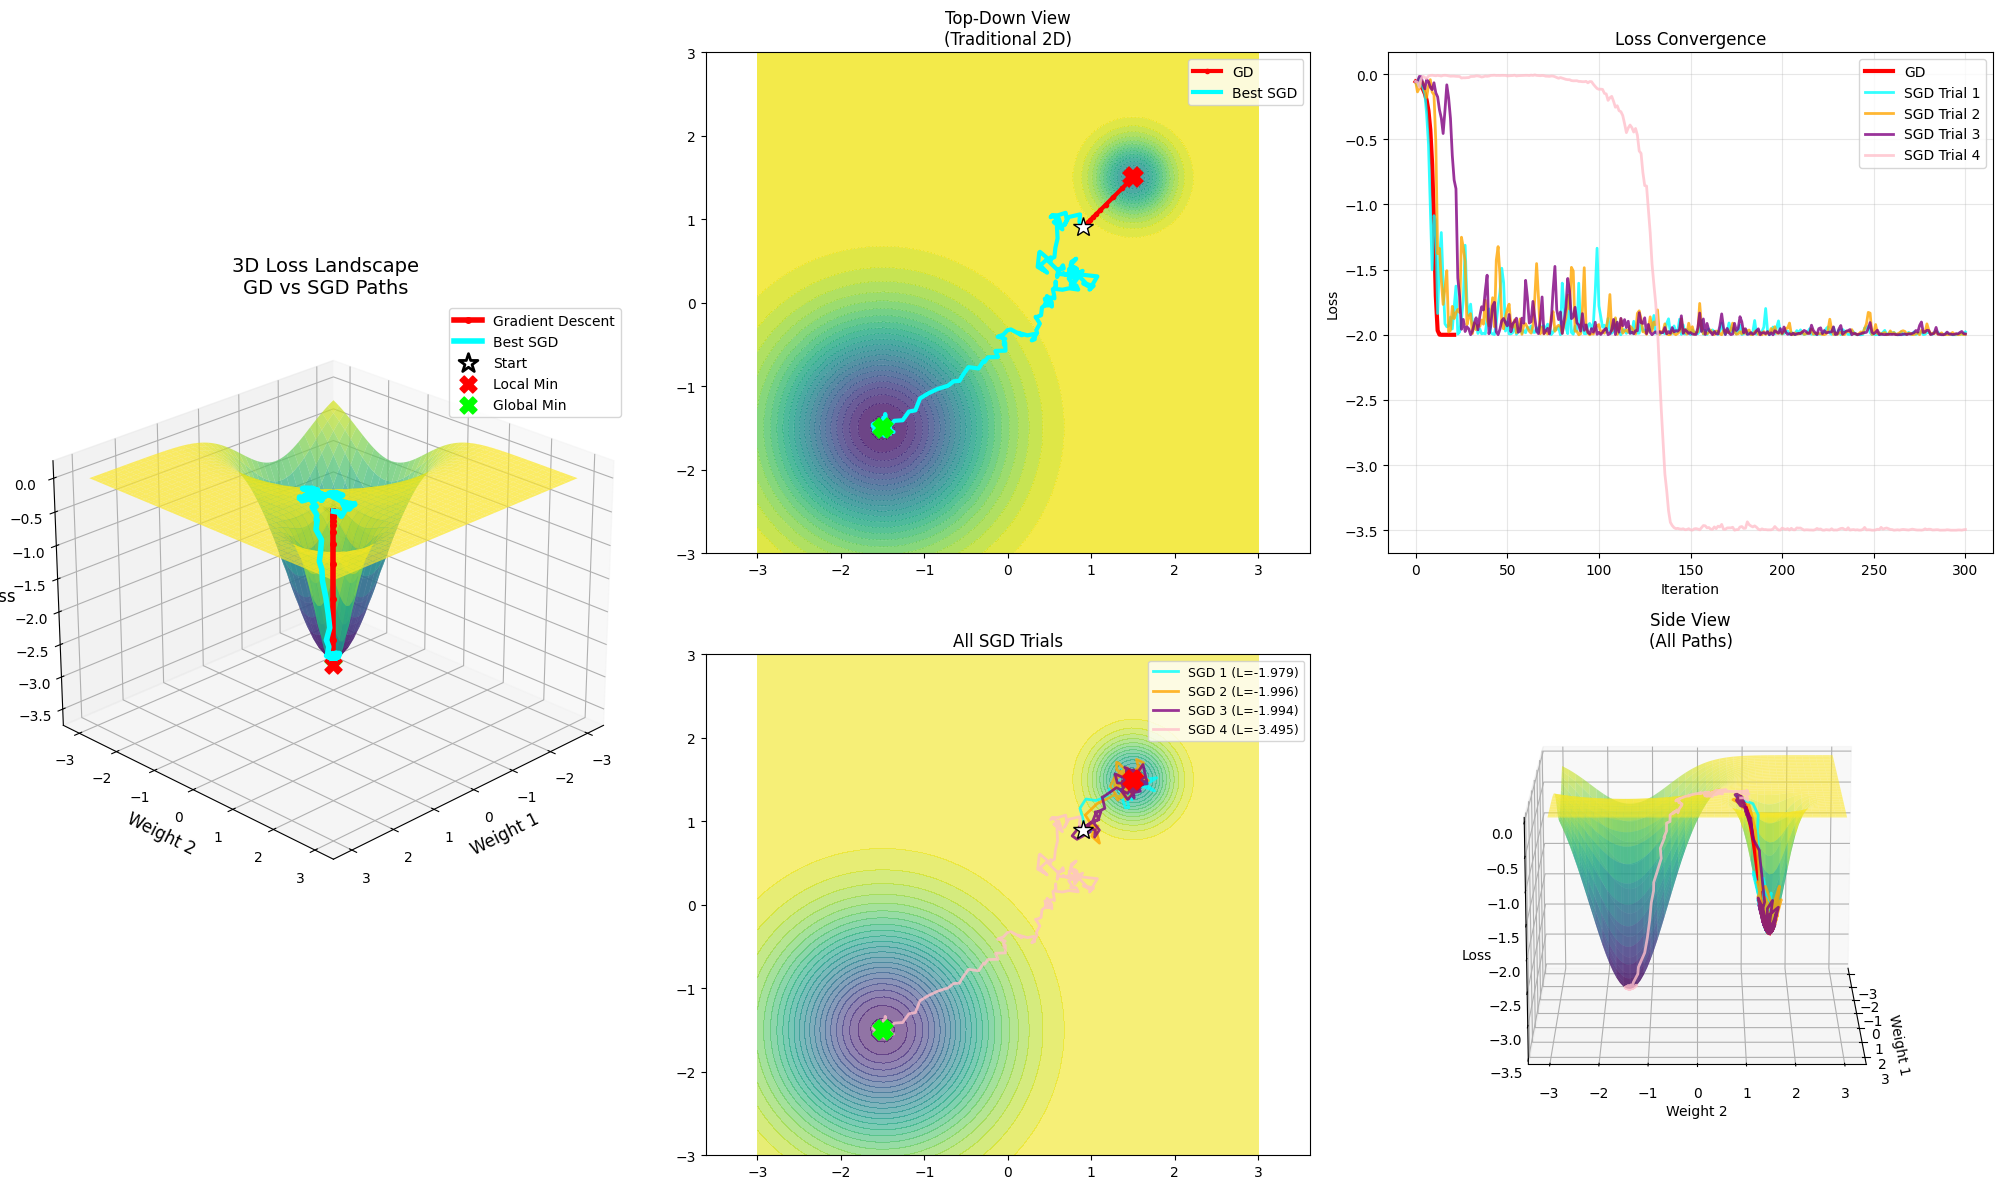


ANALYSIS:
GD final loss: -2.0000
GD path length: 22 steps
SGD Trial 1: -1.9785 (301 steps)
SGD Trial 2: -1.9958 (301 steps)
SGD Trial 3: -1.9939 (301 steps)
SGD Trial 4: -3.4946 (301 steps)

Best SGD loss: -3.4946
Improvement over GD: -74.7%

=== INTERACTIVE 3D LANDSCAPE ===


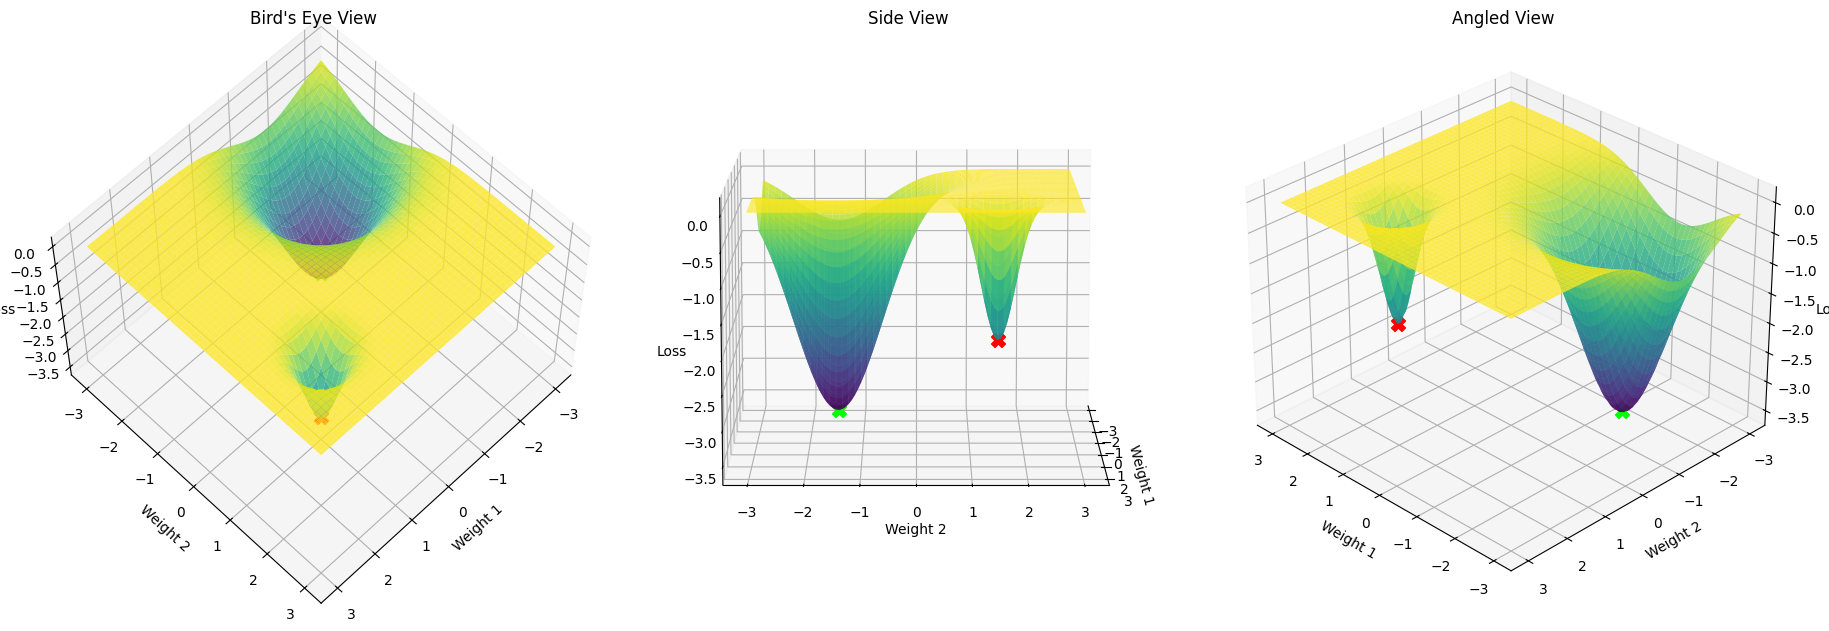

The 3D view makes it MUCH clearer:
- The 'holes' are actually deep valleys
- The local minimum is a narrow, shallow trap
- The global minimum is a wide, deep basin
- SGD's noise helps it 'jump out' of the narrow trap!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# =============================================================================
# IMPROVED CONVERGENCE + 3D VISUALIZATION
# =============================================================================

def sgd_3d_demo():
    """
    1. Adaptive noise (decreases over time)
    3. 3D visualization
    4. More realistic stopping conditions
    """

    print("=== SGD vs GD: 3D VISUALIZATION + IMPROVED CONVERGENCE ===")

    # STEP 1: Same loss landscape (your original)
    def loss_function(w):
        """Your original two-hole function"""
        w1, w2 = w[0], w[1]
        local_min = -2.0 * np.exp(-((w1 - 1.5)**2 + (w2 - 1.5)**2) / 0.2)
        global_min = -3.5 * np.exp(-((w1 + 1.5)**2 + (w2 + 1.5)**2) / 1.5)
        return local_min + global_min

    def get_gradient_components(w):
        """Your original gradient computation"""
        w1, w2 = w[0], w[1]
        local_loss = -2.0 * np.exp(-((w1 - 1.5)**2 + (w2 - 1.5)**2) / 0.2)
        global_loss = -3.5 * np.exp(-((w1 + 1.5)**2 + (w2 + 1.5)**2) / 1.5)

        grad_local_w1 = (w1 - 1.5) / 0.2 * (-2.0) * local_loss
        grad_local_w2 = (w2 - 1.5) / 0.2 * (-2.0) * local_loss
        grad_local = np.array([grad_local_w1, grad_local_w2])

        grad_global_w1 = (w1 + 1.5) / 1.5 * (-2.0) * global_loss
        grad_global_w2 = (w2 + 1.5) / 1.5 * (-2.0) * global_loss
        grad_global = np.array([grad_global_w1, grad_global_w2])

        return grad_local, grad_global

    # STEP 2: Improved optimizers with better convergence
    def run_gd_improved(start_point, lr=0.04, max_iterations=300, tolerance=1e-6):
        """GD with early stopping based on gradient magnitude"""
        path = [start_point]
        w = start_point.copy()

        for iteration in range(max_iterations):
            grad_local, grad_global = get_gradient_components(w)
            true_grad = grad_local + grad_global

            # Check for convergence
            if np.linalg.norm(true_grad) < tolerance:
                print(f"  GD converged after {iteration} iterations")
                break

            w = w - lr * true_grad
            path.append(w.copy())

        return np.array(path)

    def run_sgd_improved(start_point, lr=0.04, max_iterations=300,
                        initial_noise=2.0, noise_decay=0.995,
                        escape_chance=0.25, tolerance=1e-6, seed=42):
        """SGD with adaptive noise and better convergence"""
        np.random.seed(seed)
        path = [start_point]
        w = start_point.copy()

        noise_scale = initial_noise

        for iteration in range(max_iterations):
            grad_local, grad_global = get_gradient_components(w)
            true_grad = grad_local + grad_global

            # Adaptive noise - decreases over time for better fine-tuning
            if np.random.rand() < escape_chance:
                stochastic_grad = grad_global + np.random.randn(2) * noise_scale
            else:
                stochastic_grad = true_grad + np.random.randn(2) * noise_scale

            # Check for convergence (but be more lenient due to noise)
            if np.linalg.norm(true_grad) < tolerance and noise_scale < 0.1:
                print(f"  SGD converged after {iteration} iterations")
                break

            w = w - lr * stochastic_grad
            path.append(w.copy())

            # Decay noise over time (helps with fine convergence)
            noise_scale *= noise_decay

        return np.array(path)

    # STEP 3: Create 3D visualization
    def create_3d_visualization(start_point):
        """Create beautiful 3D landscape visualization"""

        # Create high-resolution grid for smooth surface
        x_range = np.linspace(-3, 3, 80)
        y_range = np.linspace(-3, 3, 80)
        X_grid, Y_grid = np.meshgrid(x_range, y_range)
        Z_grid = np.zeros_like(X_grid)

        for i in range(len(x_range)):
            for j in range(len(y_range)):
                Z_grid[j, i] = loss_function([X_grid[j, i], Y_grid[j, i]])

        # Run optimizers
        print("\nRunning improved optimizers...")
        path_gd = run_gd_improved(start_point, lr=0.04, max_iterations=300)

        # Run multiple SGD trials
        sgd_paths = []
        for i, seed in enumerate([42, 123, 456, 789]):
            print(f"SGD Trial {i+1}:")
            path_sgd = run_sgd_improved(start_point, lr=0.04, max_iterations=300,
                                       initial_noise=2.0, seed=seed)
            sgd_paths.append(path_sgd)

        # Create the 3D plot
        fig = plt.figure(figsize=(20, 12))

        # Plot 1: 3D Surface with paths
        ax1 = fig.add_subplot(2, 3, (1, 4), projection='3d')

        # Plot the surface
        surface = ax1.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis',
                                  alpha=0.7, linewidth=0, antialiased=True)

        # Plot GD path
        gd_z = [loss_function(point) for point in path_gd]
        ax1.plot(path_gd[:, 0], path_gd[:, 1], gd_z, 'r-o',
                linewidth=4, markersize=4, label='Gradient Descent', zorder=10)

        # Plot best SGD path
        best_sgd_path = min(sgd_paths, key=lambda path: loss_function(path[-1]))
        sgd_z = [loss_function(point) for point in best_sgd_path]
        ax1.plot(best_sgd_path[:, 0], best_sgd_path[:, 1], sgd_z, 'cyan',
                linewidth=4, markersize=4, label='Best SGD', zorder=10)

        # Mark important points
        ax1.scatter([start_point[0]], [start_point[1]], [loss_function(start_point)],
                   c='white', s=200, marker='*', edgecolors='black',
                   linewidth=2, label='Start', zorder=15)
        ax1.scatter([1.5], [1.5], [loss_function([1.5, 1.5])],
                   c='red', s=150, marker='X', label='Local Min', zorder=15)
        ax1.scatter([-1.5], [-1.5], [loss_function([-1.5, -1.5])],
                   c='lime', s=150, marker='X', label='Global Min', zorder=15)

        ax1.set_xlabel('Weight 1', fontsize=12)
        ax1.set_ylabel('Weight 2', fontsize=12)
        ax1.set_zlabel('Loss', fontsize=12)
        ax1.set_title('3D Loss Landscape\nGD vs SGD Paths', fontsize=14)
        ax1.legend()

        # Different viewing angle
        ax1.view_init(elev=25, azim=45)

        # Plot 2: Top-down view with contours
        ax2 = fig.add_subplot(2, 3, 2)
        contour = ax2.contourf(X_grid, Y_grid, Z_grid, levels=30, cmap='viridis', alpha=0.8)
        ax2.contour(X_grid, Y_grid, Z_grid, levels=30, colors='white', alpha=0.3, linewidths=0.5)

        ax2.plot(path_gd[:, 0], path_gd[:, 1], 'r-o', linewidth=3, markersize=3, label='GD')
        ax2.plot(best_sgd_path[:, 0], best_sgd_path[:, 1], 'cyan', linewidth=3, markersize=3, label='Best SGD')

        ax2.plot(start_point[0], start_point[1], 'white', marker='*', markersize=15,
                markeredgecolor='black', linewidth=2)
        ax2.plot(1.5, 1.5, 'red', marker='X', markersize=12, markeredgewidth=3)
        ax2.plot(-1.5, -1.5, 'lime', marker='X', markersize=12, markeredgewidth=3)

        ax2.set_title('Top-Down View\n(Traditional 2D)')
        ax2.axis('equal')
        ax2.legend()

        # Plot 3: Loss convergence over iterations
        ax3 = fig.add_subplot(2, 3, 3)

        gd_losses = [loss_function(point) for point in path_gd]
        ax3.plot(range(len(gd_losses)), gd_losses, 'r-', linewidth=3, label='GD')

        colors = ['cyan', 'orange', 'purple', 'pink']
        for i, path in enumerate(sgd_paths):
            sgd_losses = [loss_function(point) for point in path]
            ax3.plot(range(len(sgd_losses)), sgd_losses, color=colors[i],
                    linewidth=2, alpha=0.8, label=f'SGD Trial {i+1}')

        ax3.set_xlabel('Iteration')
        ax3.set_ylabel('Loss')
        ax3.set_title('Loss Convergence')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # Plot 4: All SGD trials (top view)
        ax4 = fig.add_subplot(2, 3, 5)
        contour4 = ax4.contourf(X_grid, Y_grid, Z_grid, levels=30, cmap='viridis', alpha=0.6)

        # Plot all SGD paths
        for i, path in enumerate(sgd_paths):
            final_loss = loss_function(path[-1])
            ax4.plot(path[:, 0], path[:, 1], color=colors[i], linewidth=2,
                    label=f'SGD {i+1} (L={final_loss:.3f})', alpha=0.8)

        ax4.plot(start_point[0], start_point[1], 'white', marker='*', markersize=15,
                markeredgecolor='black', linewidth=2)
        ax4.plot(1.5, 1.5, 'red', marker='X', markersize=12, markeredgewidth=3)
        ax4.plot(-1.5, -1.5, 'lime', marker='X', markersize=12, markeredgewidth=3)

        ax4.set_title('All SGD Trials')
        ax4.legend(fontsize=9)
        ax4.axis('equal')

        # Plot 5: 3D from different angle
        ax5 = fig.add_subplot(2, 3, 6, projection='3d')

        # Same surface, different angle
        ax5.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis',
                        alpha=0.6, linewidth=0, antialiased=True)

        # All paths in 3D
        ax5.plot(path_gd[:, 0], path_gd[:, 1], gd_z, 'r-',
                linewidth=3, label='GD', zorder=10)

        for i, path in enumerate(sgd_paths):
            path_z = [loss_function(point) for point in path]
            ax5.plot(path[:, 0], path[:, 1], path_z, color=colors[i],
                    linewidth=2, alpha=0.8, zorder=10)

        ax5.set_xlabel('Weight 1')
        ax5.set_ylabel('Weight 2')
        ax5.set_zlabel('Loss')
        ax5.set_title('Side View\n(All Paths)')
        ax5.view_init(elev=15, azim=0)  # Side view

        plt.tight_layout()
        plt.show()

        return path_gd, sgd_paths

    # STEP 4: Run the demo
    start_point = np.array([0.9, 0.9])
    print(f"Starting point: ({start_point[0]:.1f}, {start_point[1]:.1f})")

    path_gd, sgd_paths = create_3d_visualization(start_point)

    # STEP 5: Analysis
    print("\n" + "="*50)
    print("ANALYSIS:")
    print("="*50)

    gd_final_loss = loss_function(path_gd[-1])
    print(f"GD final loss: {gd_final_loss:.4f}")
    print(f"GD path length: {len(path_gd)} steps")

    for i, path in enumerate(sgd_paths):
        final_loss = loss_function(path[-1])
        print(f"SGD Trial {i+1}: {final_loss:.4f} ({len(path)} steps)")

    best_sgd_loss = min(loss_function(path[-1]) for path in sgd_paths)
    print(f"\nBest SGD loss: {best_sgd_loss:.4f}")
    print(f"Improvement over GD: {((gd_final_loss - best_sgd_loss)/gd_final_loss)*100:.1f}%")

    return path_gd, sgd_paths

# Run the demos
if __name__ == "__main__":
    sgd_3d_demo()
    interactive_3d_landscape()